In [4]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
#test mono stin postgre vasi

test_df = pd.read_csv('../data/test1.csv')
test_df.rename(columns={'predict_label': 'label'}, inplace=True)
train_df = pd.read_csv('../data/df_final_for_Reg.csv')
train_df = train_df.iloc[148:,:]



test_df['text_embedding'] = test_df['text_embedding'].apply(lambda x: x.replace('[',"").replace("]",""))
train_df['text_embedding'] = train_df['text_embedding'].apply(lambda x: x.replace('[',"").replace("]",""))


test_df['text_embedding'] = test_df['text_embedding'].apply(lambda x: [float(x) for x in x.split(',')])
train_df['text_embedding'] = train_df['text_embedding'].apply(lambda x: [float(x) for x in x.split(',')])

# train_df['text_embedding'] = train_df['text_embedding'].apply(lambda x: np.array(x, dtype=np.float64))
# test_df['text_embedding'] = test_df['text_embedding'].apply(lambda x: np.array(x, dtype=np.float64))

In [6]:
train_df.head()

,id,claim,text_embedding,label
148,0,Ένα ιογενές βίντεο που μοιράστηκε τον Ιανουάρι...,"[-0.010501774027943611, -0.01970301754772663, ...",0.0
149,1,"Εάν βρείτε ένα χαμένο παιδί στη Δανία, μπορείτ...","[0.016001451760530472, -0.0027599905151873827,...",0.0
150,2,Οι ιικές φωτογραφίες που μοιράστηκαν στις αρχέ...,"[0.01093613263219595, 0.0001262597506865859, 0...",0.0
151,3,"Σε μια ομιλία στις 6 Ιανουαρίου 2021, ο Donald...","[-0.023821726441383362, -0.01360876765102148, ...",3.0
152,4,"Στις 5 Ιανουαρίου 2024, κατά τη διάρκεια μιας ...","[-0.010232864879071712, 0.0013867882080376148,...",1.0


In [7]:
test_df.head()

,id,text,text_embedding,label
0,1,Έχουν ήδη φύγει το δεύτερο εξάμηνο του 2019 απ...,"[0.001223430735990405, -0.016094623133540154, ...",1
1,2,Το Μεταναστευτικό τώρα αποκτά μία νέα διάσταση...,"[0.00682240491732955, -0.010535278357565403, 0...",0
2,3,«Μας έκλεισαν μέσα και κυκλοφορούν παντού λαθρ...,"[0.010850735008716583, -0.021955367177724838, ...",0
3,4,Μετανάστες στον Έβρο: «[Οι Τούρκοι] Μας έβγαλα...,"[-0.0027062678709626198, -0.03142924979329109,...",0
4,5,Έτοιμοι για «απόβαση» στη Λέσβο 150.000 μετανά...,"[0.004963890183717012, 0.009464048780500889, -...",0


In [8]:
X_train = [train_df.iloc[i,2] for i in range(len(train_df))]
y_train =  np.array(train_df.label)
X_test = [test_df.iloc[i,2] for i in range(len(test_df))]
y_test = np.array(test_df.label)


c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Model Accuracy: 0.365

Model Recall: 0.365

Model Precision: 0.382

Model F1-Score: 0.363

Cross validation score: [0.318 0.362 0.376 0.479 0.765 0.779 0.676 0.662 0.742 0.648]

Classification report:
               precision    recall  f1-score   support

         0.0       0.47      0.34      0.40        79
         1.0       0.35      0.50      0.41        52
         2.0       0.07      0.06      0.06        17
         3.0       0.00      0.00      0.00         0

    accuracy                           0.36       148
   macro avg       0.22      0.23      0.22       148
weighted avg       0.38      0.36      0.36       148




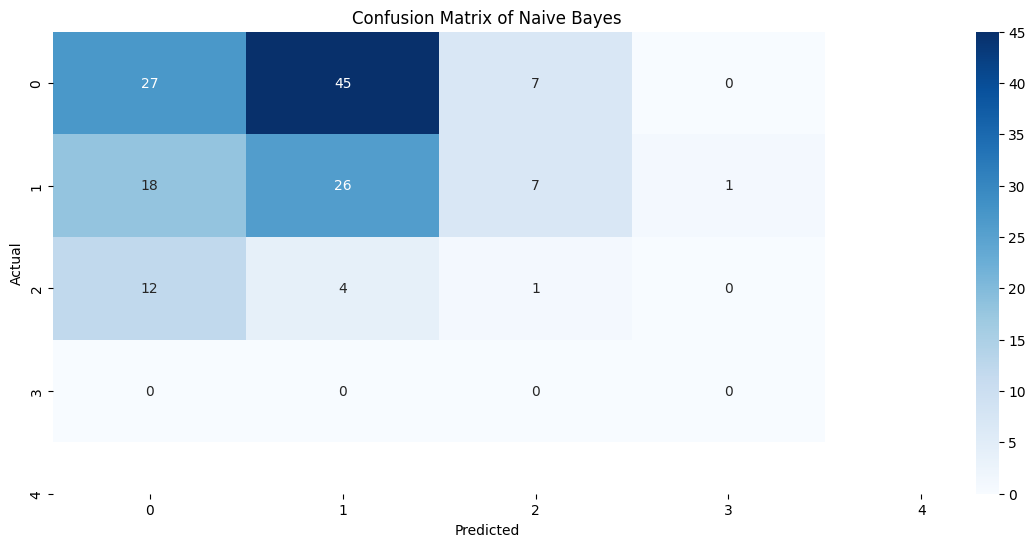

In [9]:

#Naive bayes 

#create train and test



nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(np.array(X_test))

# #model evaluation
confusion_matrix = metrics.confusion_matrix(np.array(y_test), y_pred )
classification = metrics.classification_report(np.array(y_test), y_pred )
scores = cross_val_score(nb, X_train,np.array(y_train), cv=10)

precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

#print results and plot confusion matrix
print ("Model Accuracy:", np.round(accuracy,3))
print()
print ("Model Recall:", np.round(recall,3))
print()
print ("Model Precision:", np.round(precision,3))
print()
print ("Model F1-Score:", np.round(f1,3))
print()



print ("Cross validation score:", np.round(scores,3))
print()
print("Classification report:" "\n", classification) 
print()

plt.figure(figsize=(14, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Naive Bayes')
plt.show()

c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Model Accuracy: 0.459

Model Recall: 0.459

Model Precision: 0.415

Model F1-Score: 0.434

Cross validation score: [0.542 0.559 0.582 0.667 0.845 0.869 0.85  0.836 0.845 0.84 ]

Classification report:
               precision    recall  f1-score   support

           0       0.52      0.52      0.52        79
           1       0.39      0.52      0.45        52
           2       0.00      0.00      0.00        17

    accuracy                           0.46       148
   macro avg       0.30      0.35      0.32       148
weighted avg       0.41      0.46      0.43       148




c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


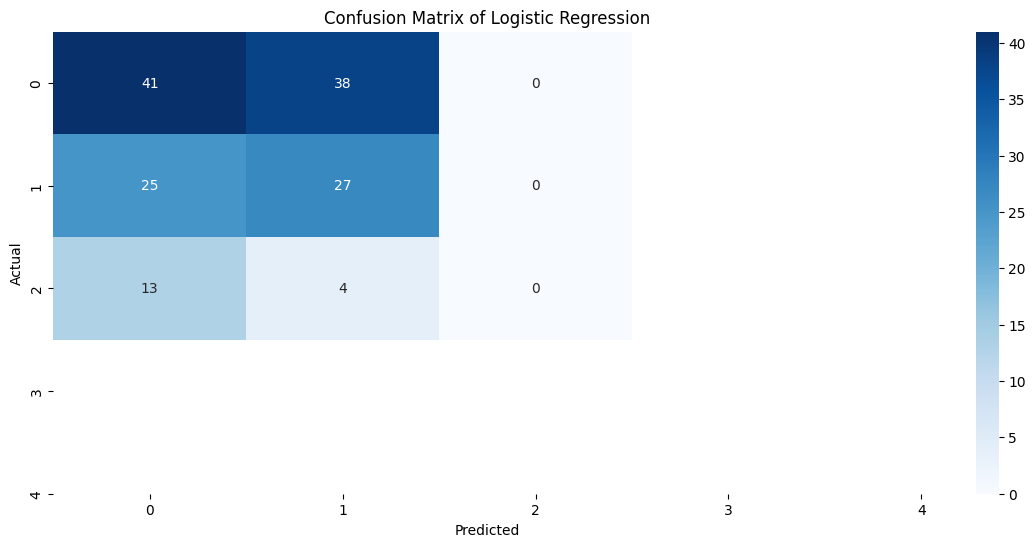

In [10]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression  

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(np.array(X_test))

#model evaluation
confusion_matrix = metrics.confusion_matrix(np.array(y_test), y_pred )
classification = metrics.classification_report(np.array(y_test), y_pred )
scores = cross_val_score(lr, X_train,np.array(y_train), cv=10)

precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
accuracy = metrics.accuracy_score(y_test, y_pred,)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

#print results and plot confusion matrix
print ("Model Accuracy:", np.round(accuracy,3))
print()
print ("Model Recall:", np.round(recall,3))
print()
print ("Model Precision:", np.round(precision,3))
print()
print ("Model F1-Score:", np.round(f1,3))
print()

print ("Cross validation score:", np.round(scores,3))
print()
print("Classification report:" "\n", classification) 
print()

plt.figure(figsize=(14, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()


c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Model Accuracy: 0.473

Model Recall: 0.473

Model Precision: 0.435

Model F1-Score: 0.447

Cross validation score: [0.542 0.559 0.582 0.667 0.845 0.869 0.85  0.836 0.845 0.84 ]

Classification report:
               precision    recall  f1-score   support

           0       0.56      0.51      0.53        79
           1       0.39      0.58      0.47        52
           2       0.00      0.00      0.00        17

    accuracy                           0.47       148
   macro avg       0.32      0.36      0.33       148
weighted avg       0.44      0.47      0.45       148




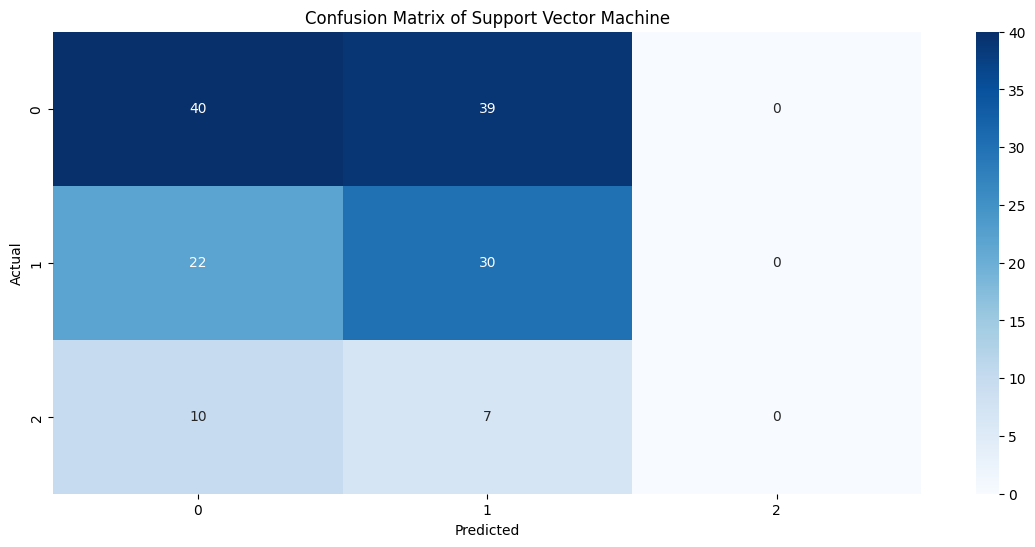

In [11]:
#SVM Model
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)


#model evaluation
confusion_matrix = metrics.confusion_matrix(np.array(y_test), y_pred )
classification = metrics.classification_report(np.array(y_test), y_pred )
scores = cross_val_score(svm_classifier, X_train,np.array(y_train), cv=10)

precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
accuracy = metrics.accuracy_score(y_test, y_pred,)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

#print results and plot confusion matrix
print ("Model Accuracy:", np.round(accuracy,3))
print()
print ("Model Recall:", np.round(recall,3))
print()
print ("Model Precision:", np.round(precision,3))
print()
print ("Model F1-Score:", np.round(f1,3))
print()

print ("Cross validation score:", np.round(scores,3))
print()
print("Classification report:" "\n", classification) 
print()

plt.figure(figsize=(14, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Support Vector Machine')
plt.show()


c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Prog

Model Accuracy: 0.5

Model Recall: 0.5

Model Precision: 0.414

Model F1-Score: 0.436

Cross validation score: [0.547 0.587 0.568 0.606 0.765 0.845 0.826 0.826 0.836 0.737]

Classification report:
               precision    recall  f1-score   support

           0       0.53      0.80      0.64        79
           1       0.37      0.21      0.27        52
           2       0.00      0.00      0.00        17

    accuracy                           0.50       148
   macro avg       0.30      0.34      0.30       148
weighted avg       0.41      0.50      0.44       148




c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


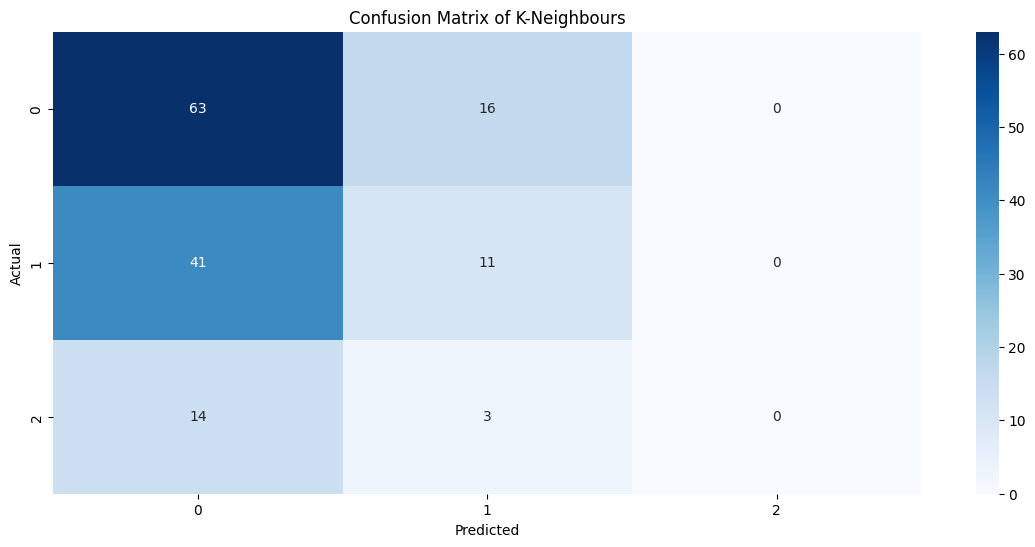

In [12]:
#k-neighbours model
from sklearn.neighbors import KNeighborsClassifier  

kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
y_pred = kn.predict(np.array(X_test))


#model evaluation
confusion_matrix = metrics.confusion_matrix(np.array(y_test), y_pred )
classification = metrics.classification_report(np.array(y_test), y_pred )
scores = cross_val_score(kn, X_train,np.array(y_train), cv=10)

precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
accuracy = metrics.accuracy_score(y_test, y_pred,)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

#print results and plot confusion matrix
print ("Model Accuracy:", np.round(accuracy,3))
print()
print ("Model Recall:", np.round(recall,3))
print()
print ("Model Precision:", np.round(precision,3))
print()
print ("Model F1-Score:", np.round(f1,3))
print()

print ("Cross validation score:", np.round(scores,3))
print()
print("Classification report:" "\n", classification) 
print()

plt.figure(figsize=(14, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of K-Neighbours')
plt.show()


c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Model Accuracy: 0.378

Model Recall: 0.378

Model Precision: 0.389

Model F1-Score: 0.38

Cross validation score: [0.397 0.418 0.427 0.488 0.568 0.657 0.634 0.582 0.568 0.577]

Classification report:
               precision    recall  f1-score   support

         0.0       0.49      0.52      0.50        79
         1.0       0.26      0.23      0.24        52
         2.0       0.33      0.18      0.23        17
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

    accuracy                           0.38       148
   macro avg       0.22      0.19      0.20       148
weighted avg       0.39      0.38      0.38       148




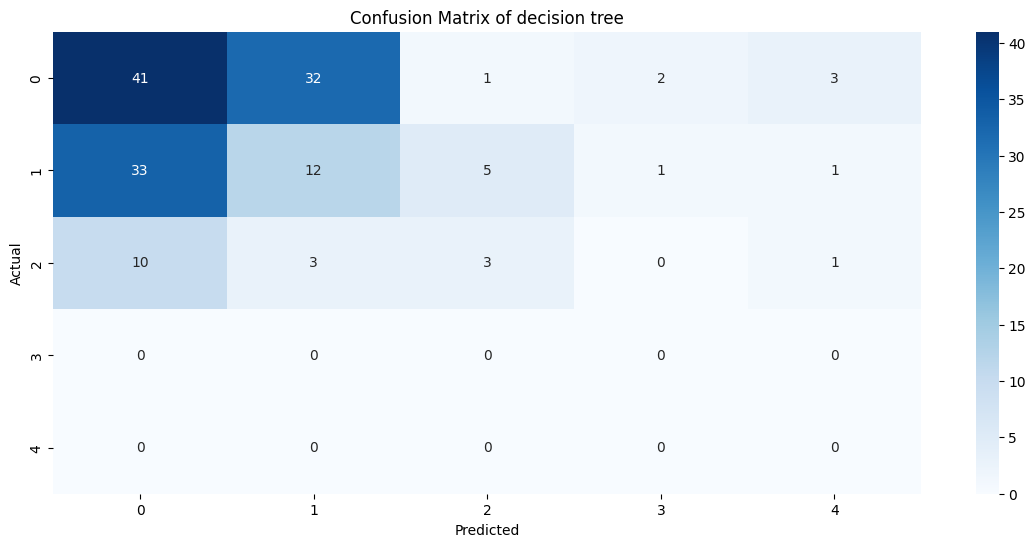

In [13]:
#decision tree
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(np.array(X_test))


#model evaluation
confusion_matrix = metrics.confusion_matrix(np.array(y_test), y_pred )
classification = metrics.classification_report(np.array(y_test), y_pred )
scores = cross_val_score(dt, X_train,np.array(y_train), cv=10)

precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
accuracy = metrics.accuracy_score(y_test, y_pred,)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

#print results and plot confusion matrix
print ("Model Accuracy:", np.round(accuracy,3))
print()
print ("Model Recall:", np.round(recall,3))
print()
print ("Model Precision:", np.round(precision,3))
print()
print ("Model F1-Score:", np.round(f1,3))
print()
print ("Cross validation score:", np.round(scores,3))
print()
print("Classification report:" "\n", classification) 
print()

plt.figure(figsize=(14, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of decision tree')
plt.show()


c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Model Accuracy: 0.439

Model Recall: 0.439

Model Precision: 0.374

Model F1-Score: 0.401

Cross validation score: [0.547 0.554 0.568 0.634 0.812 0.826 0.831 0.826 0.826 0.812]

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.65      0.56        79
           1       0.31      0.27      0.29        52
           2       0.00      0.00      0.00        17

    accuracy                           0.44       148
   macro avg       0.27      0.30      0.28       148
weighted avg       0.37      0.44      0.40       148




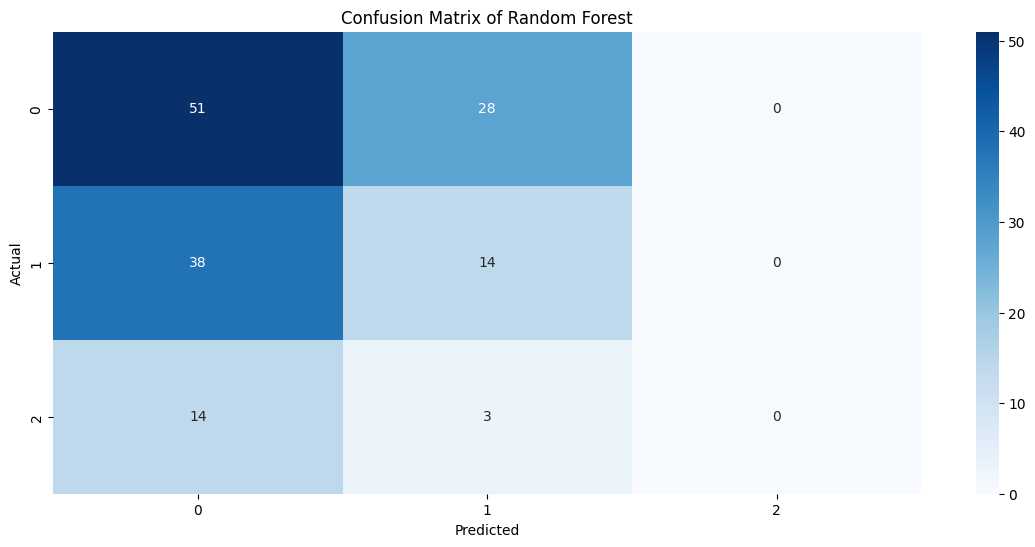

In [14]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf  = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(np.array(X_test))


#model evaluation
confusion_matrix = metrics.confusion_matrix(np.array(y_test), y_pred )
classification = metrics.classification_report(np.array(y_test), y_pred )
scores = cross_val_score(rf, X_train,np.array(y_train), cv=10)

precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
accuracy = metrics.accuracy_score(y_test, y_pred,)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

#print results and plot confusion matrix
print ("Model Accuracy:", np.round(accuracy,3))
print()
print ("Model Recall:", np.round(recall,3))
print()
print ("Model Precision:", np.round(precision,3))
print()
print ("Model F1-Score:", np.round(f1,3))
print()

print ("Cross validation score:", np.round(scores,3))
print()
print("Classification report:" "\n", classification) 
print()

plt.figure(figsize=(14, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest')
plt.show()

c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Model Accuracy: 0.426

Model Recall: 0.426

Model Precision: 0.397

Model F1-Score: 0.407

Cross validation score: [0.519 0.535 0.479 0.592 0.751 0.84  0.779 0.765 0.761 0.784]

Classification report:
               precision    recall  f1-score   support

         0.0       0.51      0.47      0.49        79
         1.0       0.36      0.50      0.42        52
         2.0       0.00      0.00      0.00        17
         4.0       0.00      0.00      0.00         0

    accuracy                           0.43       148
   macro avg       0.22      0.24      0.23       148
weighted avg       0.40      0.43      0.41       148




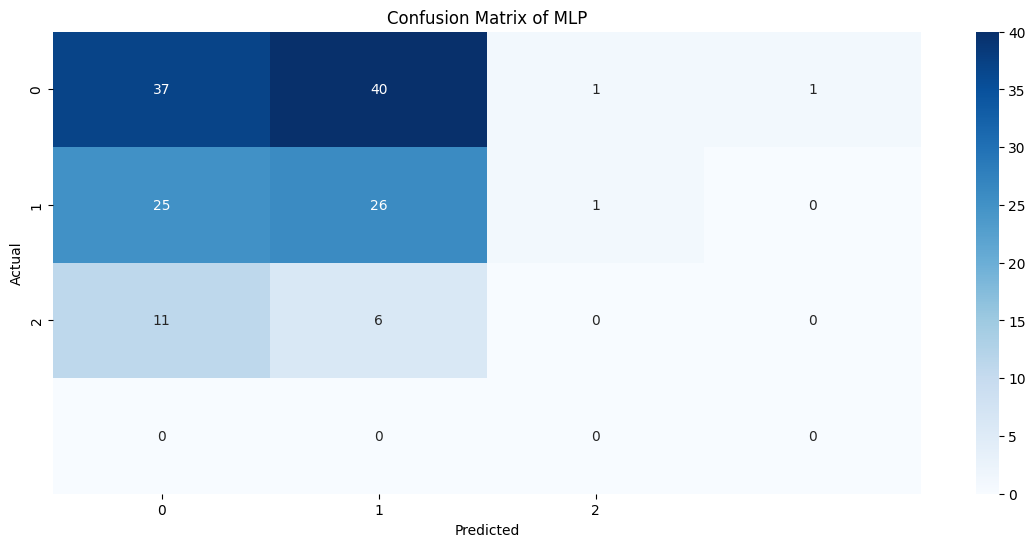

In [15]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)
y_pred = mlp_classifier.predict(X_test)

#model evaluation
confusion_matrix = metrics.confusion_matrix(np.array(y_test), y_pred )
classification = metrics.classification_report(np.array(y_test), y_pred )
scores = cross_val_score(mlp_classifier, X_train,np.array(y_train), cv=10)

precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
accuracy = metrics.accuracy_score(y_test, y_pred,)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

#print results and plot confusion matrix
print ("Model Accuracy:", np.round(accuracy,3))
print()
print ("Model Recall:", np.round(recall,3))
print()
print ("Model Precision:", np.round(precision,3))
print()
print ("Model F1-Score:", np.round(f1,3))
print()

print ("Cross validation score:", np.round(scores,3))
print()
print("Classification report:" "\n", classification) 
print()

plt.figure(figsize=(14, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of MLP')
plt.show()


In [16]:
test_df.head()

,id,text,text_embedding,label
0,1,Έχουν ήδη φύγει το δεύτερο εξάμηνο του 2019 απ...,"[0.001223430735990405, -0.016094623133540154, ...",1
1,2,Το Μεταναστευτικό τώρα αποκτά μία νέα διάσταση...,"[0.00682240491732955, -0.010535278357565403, 0...",0
2,3,«Μας έκλεισαν μέσα και κυκλοφορούν παντού λαθρ...,"[0.010850735008716583, -0.021955367177724838, ...",0
3,4,Μετανάστες στον Έβρο: «[Οι Τούρκοι] Μας έβγαλα...,"[-0.0027062678709626198, -0.03142924979329109,...",0
4,5,Έτοιμοι για «απόβαση» στη Λέσβο 150.000 μετανά...,"[0.004963890183717012, 0.009464048780500889, -...",0


In [17]:
X_test[0], y_test[0]

([0.001223430735990405,
  -0.016094623133540154,
  0.01348118856549263,
  -0.032422129064798355,
  -0.023093974217772484,
  0.01273079589009285,
  -0.03583770617842674,
  0.004505589138716459,
  0.0015751771861687303,
  -0.012789015658199787,
  0.013093054294586182,
  0.021657878533005714,
  -0.002917473902925849,
  0.0041497997008264065,
  0.0059287468902766705,
  -0.01092597283422947,
  0.002110478701069951,
  -0.0014239667216315866,
  -0.0027589858509600163,
  -0.0006610407726839185,
  -0.01245910208672285,
  0.00040471056126989424,
  0.0018371676560491323,
  -0.003680804278701544,
  0.01377875730395317,
  0.012058029882609844,
  0.010156173259019852,
  -0.02115330472588539,
  0.012983082793653011,
  -0.03759724646806717,
  -0.004570277873426676,
  -0.027997400611639023,
  0.004884019494056702,
  -0.015460671856999397,
  -0.02041584998369217,
  -0.018345801159739494,
  0.0019503734074532986,
  -0.0013366364873945713,
  0.04978465661406517,
  0.0030420003458857536,
  0.00509749352931